
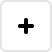
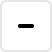
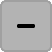
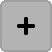
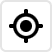
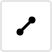
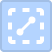
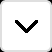
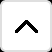
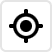
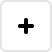
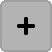
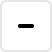
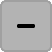
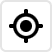
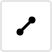
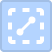
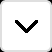
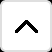
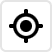

In [1]:
import os
import sys

parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from magick_benchmark_utils import benchmark_mvg_save

from functools import partial
from IPython.display import Image

import pandas as pd
import numpy as np

from lets_plot import *
LetsPlot.setup_html()

In [2]:
def point_plot(n, sh):
    np.random.seed(42)
    
    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)
    v = np.random.normal(size=n)

    return ggplot({'x': x, 'y': y, 'v': v}, aes('x', 'y', fill='x')) \
        + geom_point(shape=sh)

point_plot(1000, 21)

In [3]:
ns = [1_000, 2_000, 5_000, 10_000, 25_000, 50_000, 100_000]
shapes = [
    0, 1, 2, 3, #  only lines
    15, 16, #  only fill
    21, 22 #  fill and stroke
]

dfs = []

for shape in shapes:
    raw_data = benchmark_mvg_save(ns, partial(point_plot, sh=shape), file_prefix="shape_" + str(shape), scale=1, timeout=60)

    df_batch = pd.DataFrame(raw_data).assign(
        shape_id=shape,
        experiment_group="shape_" + str(shape),
        timestamp=pd.Timestamp.now()
    )
    
    dfs.append(df_batch)


for shape in shapes:
    raw_data = benchmark_mvg_save(ns, partial(point_plot, sh=shape), file_prefix="shape_" + str(shape), scale=2, timeout=60)

    df_batch = pd.DataFrame(raw_data).assign(
        shape_id=shape,
        experiment_group="shape_" + str(shape),
        timestamp=pd.Timestamp.now()
    )
    
    dfs.append(df_batch)

# Concatenate all at once
df = pd.concat(dfs, ignore_index=True)

shape_0@1x
[1/7] n=1000 (0.5551s)
[2/7] n=2000 (0.6485s)
[3/7] n=5000 (1.5172s)
[4/7] n=10000 (2.8956s)
[5/7] n=25000 (5.0997s)
[6/7] n=50000 (9.9952s)
[7/7] n=100000 (26.5828s)
shape_1@1x
[1/7] n=1000 (0.4085s)
[2/7] n=2000 (0.5819s)
[3/7] n=5000 (0.9956s)
[4/7] n=10000 (1.4546s)
[5/7] n=25000 (3.5322s)
[6/7] n=50000 (10.0253s)
[7/7] n=100000 (36.4421s)
shape_2@1x
[1/7] n=1000 (0.5265s)
[2/7] n=2000 (0.7139s)
[3/7] n=5000 (1.5638s)
[4/7] n=10000 (2.7701s)
[5/7] n=25000 (6.4460s)
[6/7] n=50000 (16.1024s)
[7/7] n=100000 (42.6294s)
shape_3@1x
[1/7] n=1000 (0.5160s)
[2/7] n=2000 (0.6906s)
[3/7] n=5000 (2.0493s)
[4/7] n=10000 (3.1461s)
[5/7] n=25000 (7.3321s)
[6/7] n=50000 (51.4738s)
[7/7] n=100000 (TIMEOUT)
shape_15@1x


[1/7] n=1000 (0.3733s)
[2/7] n=2000 (0.5360s)
[3/7] n=5000 (0.9785s)
[4/7] n=10000 (1.5960s)
[5/7] n=25000 (6.2854s)
[6/7] n=50000 (7.5084s)
[7/7] n=100000 (20.0107s)
shape_16@1x
[1/7] n=1000 (0.3467s)
[2/7] n=2000 (0.5834s)
[3/7] n=5000 (0.8964s)
[4/7] n=10000 (1.4442s)
[5/7] n=25000 (3.2539s)
[6/7] n=50000 (6.4224s)
[7/7] n=100000 (14.4841s)
shape_21@1x
[1/7] n=1000 (0.3795s)
[2/7] n=2000 (0.5357s)
[3/7] n=5000 (0.9403s)
[4/7] n=10000 (1.6050s)
[5/7] n=25000 (3.4271s)
[6/7] n=50000 (7.9563s)
[7/7] n=100000 (19.9901s)
shape_22@1x
[1/7] n=1000 (0.4779s)
[2/7] n=2000 (0.8100s)
[3/7] n=5000 (1.3540s)
[4/7] n=10000 (2.2808s)
[5/7] n=25000 (7.5345s)
[6/7] n=50000 (11.2940s)
[7/7] n=100000 (31.3340s)
shape_0@2x
[1/7] n=1000 (0.7377s)
[2/7] n=2000 (1.0841s)
[3/7] n=5000 (2.4023s)
[4/7] n=10000 (11.6967s)
[5/7] n=25000 (TIMEOUT)
[6/7] n=50000 (SKIPPED - previous timeout)
[7/7] n=100000 (SKIPPED - previous timeout)
shape_1@2x


[1/7] n=1000 (0.7073s)
[2/7] n=2000 (1.1934s)
[3/7] n=5000 (1.9777s)
[4/7] n=10000 (3.8977s)
[5/7] n=25000 (29.6918s)
[6/7] n=50000 (TIMEOUT)
[7/7] n=100000 (SKIPPED - previous timeout)
shape_2@2x


[1/7] n=1000 (0.7840s)
[2/7] n=2000 (1.3473s)
[3/7] n=5000 (5.9137s)
[4/7] n=10000 (19.4752s)
[5/7] n=25000 (TIMEOUT)
[6/7] n=50000 (SKIPPED - previous timeout)
[7/7] n=100000 (SKIPPED - previous timeout)
shape_3@2x


[1/7] n=1000 (0.7432s)
[2/7] n=2000 (1.1754s)
[3/7] n=5000 (2.7622s)
[4/7] n=10000 (15.4605s)
[5/7] n=25000 (TIMEOUT)
[6/7] n=50000 (SKIPPED - previous timeout)
[7/7] n=100000 (SKIPPED - previous timeout)
shape_15@2x


[1/7] n=1000 (0.6134s)
[2/7] n=2000 (0.7676s)
[3/7] n=5000 (1.3246s)
[4/7] n=10000 (2.2712s)
[5/7] n=25000 (7.4077s)
[6/7] n=50000 (11.3809s)
[7/7] n=100000 (28.3815s)
shape_16@2x
[1/7] n=1000 (0.6138s)
[2/7] n=2000 (0.6421s)
[3/7] n=5000 (1.2220s)
[4/7] n=10000 (1.9385s)
[5/7] n=25000 (4.1532s)
[6/7] n=50000 (12.2579s)
[7/7] n=100000 (19.9301s)
shape_21@2x
[1/7] n=1000 (0.6660s)
[2/7] n=2000 (0.9494s)
[3/7] n=5000 (1.7125s)
[4/7] n=10000 (4.2022s)
[5/7] n=25000 (28.6361s)
[6/7] n=50000 (TIMEOUT)
[7/7] n=100000 (SKIPPED - previous timeout)
shape_22@2x


[1/7] n=1000 (0.7322s)
[2/7] n=2000 (1.0641s)
[3/7] n=5000 (2.6759s)
[4/7] n=10000 (12.7704s)
[5/7] n=25000 (TIMEOUT)
[6/7] n=50000 (SKIPPED - previous timeout)
[7/7] n=100000 (SKIPPED - previous timeout)


In [4]:
df.head()

,n,prefix,scale,time_map,time_paint,time_snapshot,time_total,shape_id,experiment_group,timestamp,error
0,1000,shape_0,1,0.292863,0.008858,0.253420,0.555140,0,shape_0,2025-11-21 16:39:25.198629,NaN
1,2000,shape_0,1,0.399855,0.015667,0.233024,0.648546,0,shape_0,2025-11-21 16:39:25.198629,NaN
2,5000,shape_0,1,0.789529,0.046503,0.681201,1.517233,0,shape_0,2025-11-21 16:39:25.198629,NaN
3,10000,shape_0,1,2.042979,0.078213,0.774439,2.895631,0,shape_0,2025-11-21 16:39:25.198629,NaN
4,25000,shape_0,1,3.275948,0.329366,1.494409,5.099723,0,shape_0,2025-11-21 16:39:25.198629,NaN


In [5]:
ggplot(df) + geom_line(aes(x='n', y='time_snapshot', color=as_discrete('shape_id'))) + facet_grid(x='scale')

In [6]:
df.to_csv("point_variant_optimized.csv", index=False)